In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from IPython.display import Image as PImage
from subprocess import check_call
#from PIL import Image, ImageDraw, ImageFont
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_colwidth', 200)

<br>

In [5]:
data_description = pd.read_csv("./cols_data_specs.csv")
data_col_fixed = ['label']; data_col_fixed.extend(data_description.sort_values("specification").iloc[:,1])
data_description

specification             variable  \
0        tipsbp10-PC_GDP_3Y-NSA-CA-BAL-WRL_REST         PC_CA-avg_3y   
1                               tipser10-PCH_1Y          REER-pch_1y   
2                               tipser10-PCH_3Y          REER-pch_3y   
3            tipsex10-PCH_WRL_5Y-G-CRE-WRL_REST   X_G_share_M-pch_5y   
4           tipsex10-PCH_WRL_5Y-GS-CRE-WRL_REST  X_GS_share_M-pch_5y   
5            tipsex10-PCH_WRL_5Y-S-CRE-WRL_REST   X_S_share_M-pch_5y   
6               tipsfs10-F-NCO-S12-LIAB-MIO_NAC              FSL-mil   
7               tipsfs10-F-NCO-S12-LIAB-PCH_PRE              FSL-pch   
8                tipsfs10-F-NCO-S12-LIAB-PC_GDP           FSL-pc_gdp   
9                       tipsgo10-GD-S13-MIO_NAC               GD-mil   
10                       tipsgo10-GD-S13-PC_GDP            GD-pc_gdp   
11                           tipsho10-INX_A_AVG              HPI-pch   
12                           tipsho10-RCH_A_AVG            HPI-index   
13  tipsii10-NSA-FA-S1-S1-N_LE-WRL_REST-MIO_NAC             NIIP-mil   
14   tipsii10-NSA-FA-S1-S1-N_LE-WRL_REST-PC_GDP          NIIP-pc_gdp   
15                     tipslm10-NULC_PER-PCH_3Y           ULC-pch_3y   
16                            tipslm60-T-PC_POP           ACT-pc_pop   
17                           tipslm60-T-PPCH_3Y           ACT-pch_3y   
18                            tipslm70-PC_ACT-T           LTU-pc_pop   
19                           tipslm70-PPCH_3Y-T           LTU-pch_3y   
20                     tipslm80-Y_LT25-T-PC_ACT           YUR-pc_act   
21                    tipslm80-Y_LT25-T-PPCH_3Y           YUR-pch_3y   
22   tipspc20-CO-S11_S14_S15-LIAB-F3_F4-MIO_NAC             PSCF-mil   
23    tipspc20-CO-S11_S14_S15-LIAB-F3_F4-PC_GDP          PSCF-pc_gdp   
24   tipspd20-CO-S11_S14_S15-LIAB-F3_F4-MIO_NAC              PSD-mil   
25    tipspd20-CO-S11_S14_S15-LIAB-F3_F4-PC_GDP           PSD-pc_gdp   
26                      tipsun10-TOTAL-AVG_3Y-T            UR-avg_3y   

                                                                          description  \
0                                            Current account balance - 3 year average   
1       Real effective exchange rate (42 trading partners based on HICP/CPI) - 1y pch   
2       Real effective exchange rate (42 trading partners based on HICP/CPI) - 3y pch   
3                                           G Export market shares - 5 years % change   
4                                          GS Export market shares - 5 years % change   
5                                           G Export market shares - 5 years % change   
6        Total financial sector liabilities non-consolidated - annual data - millions   
7       Total financial sector liabilities non-consolidated - annual data - 1y change   
8          Total financial sector liabilities non-consolidated - annual data - pc gdp   
9   General government gross debt (EDP concept) consolidated - annual data - millions   
10    General government gross debt (EDP concept) consolidated - annual data - pc gdp   
11                                    House price index deflated - annual data - pch    
12                                   House price index deflated - annual data - index   
13                     Net international investment position - annual data - millions   
14                       Net international investment position - annual data - pc gdp   
15                                        Nominal unit labour cost - 3 years % change   
16                          Activity rate - % of total population aged 15-64 - pc pop   
17                          Activity rate - % of total population aged 15-64 - pch 3y   
18             Long-term unemployment rate % of active population aged 15-74 - pc pop   
19             Long-term unemployment rate % of active population aged 15-74 - pch 3y   
20               Youth unemployment rate - % of active population aged 15-24 - pc act   
21               Youth unemployment rate - % of active popu

<br>

In [6]:
data = pd.read_csv("./data.csv", index_col=0)
data = data[sorted(data.columns)]
data.columns = data_col_fixed
data.to_csv("./dataset.csv")

In [7]:
data.iloc[(np.r_[0:6, -6:0])]

label  PC_CA-avg_3y  REER-pch_1y  REER-pch_3y  X_G_share_M-pch_5y  \
2011_AT      0           2.4          0.5         -1.8              -11.86   
2011_BE      2          -0.1          0.6         -1.5              -12.46   
2011_CZ      0          -2.6          2.0         -0.5                7.84   
2011_DE      0           5.8         -0.6         -4.8               -9.12   
2011_DK      2           5.5         -0.6         -2.5              -12.57   
2011_EE      0           1.9          1.1         -0.8               38.99   
2017_PT      2           0.4          0.6         -0.7               11.73   
2017_RO      0          -2.2         -1.8         -5.5               31.40   
2017_SE      2           3.7         -0.7         -5.4               -6.37   
2017_SI      1           5.7         -0.4         -2.0               22.68   
2017_SK      0          -2.0         -0.2         -1.9                8.86   
2017_UK      0          -4.5         -4.6        -10.7               -4.08   

         X_GS_share_M-pch_5y  X_S_share_M-pch_5y     FSL-mil  FSL-pch  \
2011_AT               -12.46              -14.57   1537010.7      1.5   
2011_BE                -7.63               11.13   2285631.7      5.4   
2011_CZ                 7.43                5.69   6794617.0      4.3   
2011_DE                -9.09               -8.38  12968900.0      2.9   
2011_DK               -13.75              -16.46  14409675.0      1.6   
2011_EE                24.29               -3.08     27965.7     -0.2   
2017_PT                14.62               11.81    804285.7      1.8   
2017_RO                37.02               55.39    778658.5      8.1   
2017_SE                -4.36               -4.13  27222717.0      6.8   
2017_SI                18.64                5.58     69443.0      5.1   
2017_SK                 6.67               12.88    148886.9     17.9   
2017_UK                -0.98               -7.05  21822784.0     -1.7   

         FSL-pc_gdp  ...  ACT-pch_3y  LTU-pc_pop  LTU-pch_3y  YUR-pc_act  \
2011_AT       495.6  ...         0.7         1.2         0.2         8.9   
2011_BE       602.9  ...        -0.4         3.5         0.2        18.7   
2011_CZ       168.4  ...         0.8         2.7         0.5        18.1   
2011_DE       479.8  ...         1.4         2.8        -1.1         8.5   
2011_DK       780.2  ...        -1.4         1.8         1.3        14.2   
2011_EE       167.8  ...         0.5         7.1         5.4        22.4   
2017_PT       413.3  ...         1.5         4.5        -3.9        23.8   
2017_RO        90.9  ...         1.6         2.0        -0.8        18.3   
2017_SE       594.5  ...         1.0         1.2        -0.2        17.8   
2017_SI       161.5  ...         3.3         3.1        -2.2        11.2   
2017_SK       175.5  ...         1.8         5.1        -4.2        18.9   
2017_UK      1067.4  ...         0.9         1.1        -1.1        12.1   

         YUR-pch_3y  PSCF-mil  PSCF-pc_gdp    PSD-mil  PSD-pc_gdp  UR-avg_3y  
2011_AT         0.4    9182.0          3.0   401390.3       129.4        4.9  
2011_BE         0.7   82136.7         21.7   687974.2       181.5        7.8  
2011_CZ         8.2   83417.0          2.1  2756980.0        68.3        6.9  
2011_DE        -1.9   42263.0          1.6  2771693.0       102.5        6.8  
2011_DK         6.2   82069.0          4.4  4081505.0       221.0        7.0  
2011_EE        10.4    -180.6         -1.1    20073.4       120.4       14.2  
2017_PT       -10.9    2545.9          1.3   315680.0       162.2       10.9  
2017_RO        -5.7   14307.7          1.7   436528.4        51.0        5.9  
2017_SE        -5.1  598326.0         13.1  8901611.0       194.4        7.0  
2017_SI        -9.0     364.0          0.8    32506.0        75.6        7.9  
2017_SK       -10.8    5020.0          5.9    81568.5        96.1        9.8  
2017_UK        -4.9  167227.0          8.2  3516120.0       171.5        4.8  

[12 rows x 28 columns]

<br>

____________

In [188]:
def UnderOverSample(choice, df):
    output = pd.DataFrame()
    if choice == "under":
        under_count = df.label.value_counts().min()
        for i in df.label.value_counts().index.values:
            output = pd.concat([output,  df[df.label == i].sample(under_count)], axis=0)
    elif choice == "over":
        over_count = df.label.value_counts().max()
        for i in df.label.value_counts().index.values:
            output = pd.concat([output,  df[df.label == i].sample(over_count, replace=True)], axis=0)
    
    return(output, output.iloc[:,output.columns!="label"], output.label)

In [301]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size = 0.30, random_state = 0, shuffle=True)
#X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X_sm, columns=list(data.columns[1:])), pd.DataFrame(y_sm, columns=["label"]), test_size = 0.2, random_state = 42, shuffle=True)
train, X_train, y_train = UnderOverSample("over", pd.concat([X_train, y_train], axis=1))
test = pd.concat([X_test, y_test], axis = 1)

In [309]:
y_test.value_counts().sort_index()

0    17
1     5
2    20
3     4
4     4
Name: label, dtype: int64

In [303]:
y_train.value_counts().sort_index()

0    42
1    42
2    42
3    42
4    42
Name: label, dtype: int64

In [304]:
y_test.value_counts().sort_index()

0    17
1     5
2    20
3     4
4     4
Name: label, dtype: int64

______________

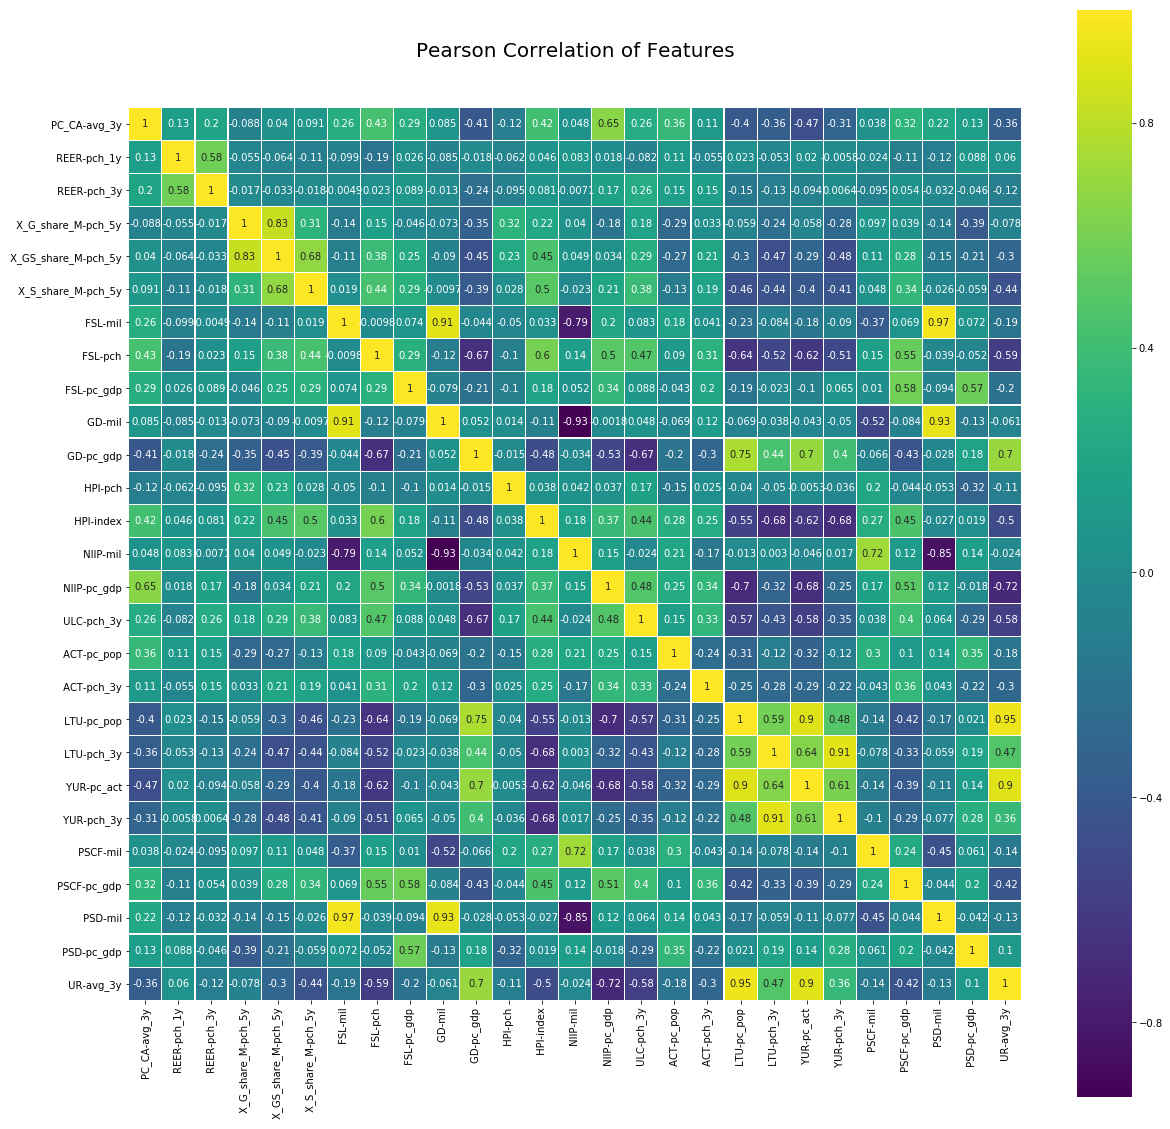

In [305]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [300]:
cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = len(list(test))
depth_range = range(1, max_attributes + 1)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(train):
        f_train = train.iloc[train_fold] # Extract train data with cv indices
        f_valid = train.iloc[valid_fold] # Extract valid data with cv indices

        model = tree_model.fit(X = f_train.drop(['label'], axis=1), 
                               y = f_train["label"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['label'], axis=1), 
                                y = f_valid["label"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.000000
         2          0.166667
         3          0.355556
         4          0.505556
         5          0.755556
         6          0.838889
         7          0.850000
         8          0.855556
         9          0.838889
        10          0.844444
        11          0.861111
        12          0.833333
        13          0.850000
        14          0.850000
        15          0.838889
        16          0.855556
        17          0.838889
        18          0.861111
        19          0.827778
        20          0.850000
        21          0.838889
        22          0.850000
        23          0.833333
        24          0.827778
        25          0.838889
        26          0.827778
        27          0.833333
        28          0.838889


In [292]:
# Create Decision Tree with max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth = 7)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [293]:
# Predicting results for test dataset
y_pred = decision_tree.predict(X_test)

In [294]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.57      0.51        21
           1       0.00      0.00      0.00         5
           2       0.58      0.30      0.40        23
           3       0.25      0.60      0.35         5
           4       0.60      0.75      0.67         4

   micro avg       0.43      0.43      0.43        58
   macro avg       0.38      0.45      0.39        58
weighted avg       0.46      0.43      0.42        58



<br>

Confusion matrix:
 [[13  0  5  2  1]
 [ 4  0  1  0  0]
 [10  0  7  5  1]
 [ 1  0  1  3  0]
 [ 0  0  1  0  3]]


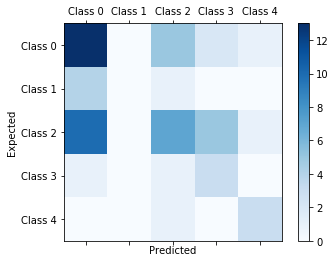

In [291]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

<br>

In [286]:
# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(train.drop(['label'], axis=1)),
                              class_names = ["0", "1", "2", "3", "4"],
                              rounded = True,
                              filled= True )

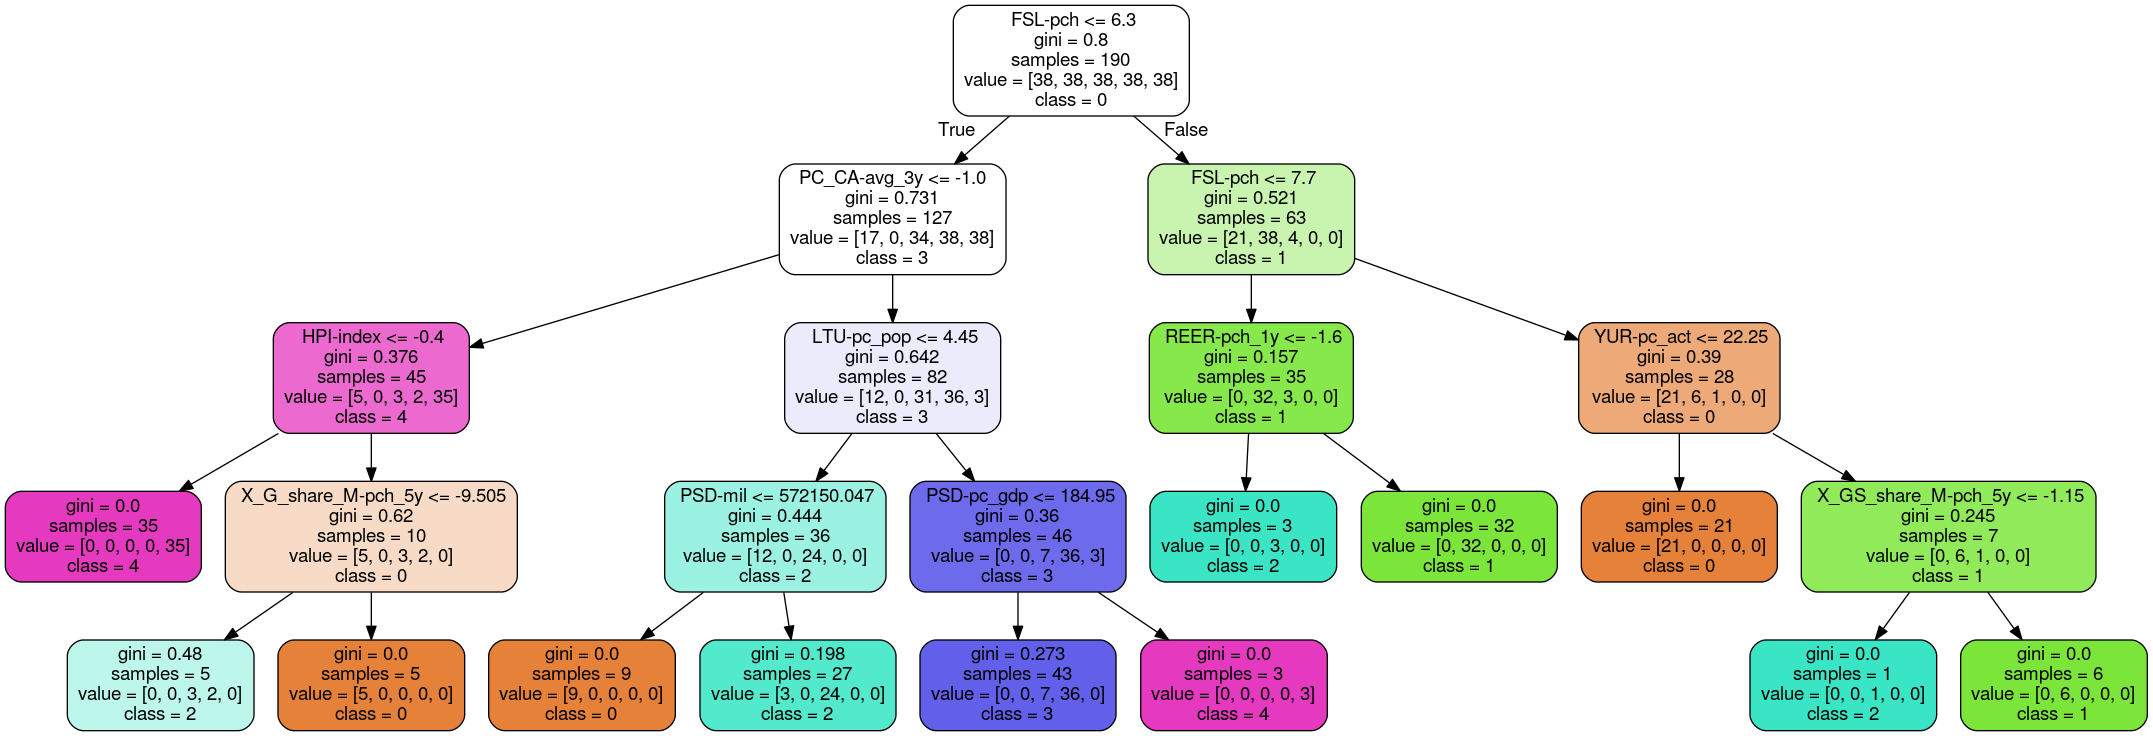

In [287]:
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', 26)
img.save('sample-out.png')
PImage("sample-out.png")

# Code to check available fonts and respective paths
# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

****

In [316]:
y_pred

array([0, 1, 3, 4, 2, 4, 0, 2, 0, 0, 2, 3, 0, 3, 3, 0, 2, 1, 2, 0, 2, 0,
       0, 3, 2, 4, 3, 2, 3, 0, 0, 4, 0, 3, 0, 0, 1, 0, 0, 4, 3, 0, 2, 0,
       0, 0, 3, 0, 3, 0, 2, 0, 3, 2, 0, 0, 2, 0])

<br>

<br>